In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

In [4]:
pwd

'C:\\Users\\nicolas\\Documents\\Ciencias de Datos\\Trabajo'

In [5]:
ls

 Volume in drive C is OS
 Volume Serial Number is 84CC-93E0

 Directory of C:\Users\nicolas\Documents\Ciencias de Datos\Trabajo

17/11/2019  18:32    <DIR>          .
17/11/2019  18:32    <DIR>          ..
26/10/2019  09:23    <DIR>          .ipynb_checkpoints
26/10/2019  09:31    <DIR>          Dataset
17/11/2019  18:32           320,950 EDH.ipynb
17/11/2019  18:27           196,583 Prediccion de pobreza.docx
05/10/2019  13:03           815,076 TP Cuatrimestral v1.ipynb
04/10/2019  17:33           542,370 TP Cuatrimestral.ipynb
05/10/2019  09:33    <DIR>          Tp petroleo
06/11/2019  22:39        22,296,541 usu_individual_t119.csv
               5 File(s)     24,171,520 bytes
               5 Dir(s)  395,427,491,840 bytes free


In [6]:
edh = pd.read_csv(r'C:\Users\nicolas\Documents\Ciencias de Datos\Trabajo\usu_individual_t119.csv', delimiter=';', parse_dates = True)

C:\Users\nicolas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9,95,100,102,105,134,136,139,143,145,148,150,154,155,158,176) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
edh_clean=edh.iloc[:,[6,11,13,14,15,16,17,22, 26,27,28,29,141,162,169,177]]

In [8]:
edh_clean.shape

(59369, 16)

In [9]:
edh_clean.rename(columns={"CH04":"Sexo","CH06":"Edad","CH07":"Estado_Civil","CH08":"Tipo_de_Cobertura","CH09":"Sabe_leer_y_escribir?", "CH10":"Estudia?","NIVEL_ED":"Nivel_Educativo","CH15":"Nacionalidad","Estado":"Condición_Laboral","CAT_OCUP":"Categoria_Ocupacional","CAT_INAC":"Categoria_Inactividad", "P47T":"Monto_Ingreso_Individual", "ITF":"Monto_Ingreso_Familiar", "IPCF":"Monto_Ingreso_Per_Capita", "NHH":"Habitantes_Hogar"}, inplace=True)
edh_clean.head()

C:\Users\nicolas\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,REGION,Sexo,Edad,Estado_Civil,Tipo_de_Cobertura,Sabe_leer_y_escribir?,Estudia?,Nacionalidad,Nivel_Educativo,ESTADO,Categoria_Ocupacional,Categoria_Inactividad,Monto_Ingreso_Individual,Monto_Ingreso_Familiar,Monto_Ingreso_Per_Capita,Habitantes_Hogar
0,41,2,28,1,4,1,2,1,4,3,0,4,2000.0,7000,1750,4
1,41,2,13,5,4,1,1,1,3,3,0,3,0.0,7000,1750,4
2,41,1,1,5,4,3,0,1,7,4,0,5,0.0,7000,1750,4
3,41,2,41,5,4,1,2,1,5,1,3,0,6200.0,6200,3100,2
4,41,2,9,5,4,1,1,1,1,4,0,3,0.0,6200,3100,2


In [10]:
edh_clean["Monto_Ingreso_Familiar"].describe()

count    5.936900e+04
mean     3.235771e+04
std      3.591157e+04
min      0.000000e+00
25%      1.000000e+04
50%      2.580000e+04
75%      4.500000e+04
max      2.013299e+06
Name: Monto_Ingreso_Familiar, dtype: float64

In [11]:
edh_clean.describe()

,REGION,Sexo,Edad,Estado_Civil,Tipo_de_Cobertura,Sabe_leer_y_escribir?,Estudia?,Nacionalidad,Nivel_Educativo,ESTADO,Categoria_Ocupacional,Categoria_Inactividad,Monto_Ingreso_Individual,Monto_Ingreso_Familiar,Monto_Ingreso_Per_Capita,Habitantes_Hogar
count,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,59369.000000,5.925800e+04,5.936900e+04,5.936900e+04,59369.000000
mean,34.886759,1.516549,34.724621,3.496303,2.193990,1.116172,1.671327,1.433240,3.716199,2.283060,1.196348,1.685661,1.052400e+04,3.235771e+04,9.750320e+03,3.308494
std,15.627859,0.499730,22.338798,1.642767,2.008844,0.389825,0.570723,0.864445,1.821816,1.147375,1.397464,1.903531,2.102426e+04,3.591157e+04,1.312682e+04,2.489301
min,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,40.000000,1.000000,16.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000e+04,2.500000e+03,1.000000
50%,42.000000,2.000000,32.000000,5.000000,1.000000,1.000000,2.000000,1.000000,4.000000,3.000000,0.000000,1.000000,2.000000e+03,2.580000e+04,6.900000e+03,3.000000
75%,43.000000,2.000000,51.000000,5.000000,4.000000,1.000000,2.000000,1.000000,5.000000,3.000000,3.000000,3.000000,1.550000e+04,4.500000e+04,1.300000e+04,5.000000
max,44.000000,2.000000,103.000000,9.000000,123.000000,3.000000,3.000000,9.000000,7.000000,4.000000,9.000000,7.000000,2.003999e+06,2.013299e+06,1.006650e+06,20.000000


In [12]:
edh_clean['Sexo'] = edh_clean['Sexo'].map({1 : 'Hombre' ,2 : 'Mujer'})
edh_clean['Nacionalidad'] = edh_clean['Nacionalidad'].map({1 : 'Argentino' ,2 : 'Argentino',3:'Argentino',4: 'Extranjero',5 : 'Extranjero'})
edh_clean['REGION'] = edh_clean['REGION'].map({1 : 'Gran Buenos Aires' ,40 : 'Noroeste',41:'Nordeste',42: 'Cuyo',43 : 'Pampeana',44:"Patagónica"})
edh_clean['Estado_Civil'] = edh_clean['Estado_Civil'].map({1 : 'Unido' ,2 : 'Casado',3:'Separado',4: 'Viudo',5 : 'Soltero'})
edh_clean['Tipo_de_Cobertura'] = edh_clean['Tipo_de_Cobertura'].map({1 : 'Obra Social' ,2 : 'Mutual/Prepaga',3:'Planes y seguros publicos',4: 'No',12 : 'Servicio de Emergencia'})
edh_clean['Sabe_leer_y_escribir?'] = edh_clean['Sabe_leer_y_escribir?'].map({1 : 'Si' ,2 : 'No',3:'Menor de 3 años'})
edh_clean['Estudia?'] = edh_clean['Estudia?'].map({1 : 'Si, asiste' ,2 : 'No, pero asistio',3:'Nunca asistio'})
edh_clean['Nivel_Educativo'] = edh_clean['Nivel_Educativo'].map({1 : 'Primaria Incompleta' ,2 : 'Primaria Completa', 3:'Secundario Incompleta', 4: 'Secundario Completa',5: 'Universidad Incompleta',6: 'Universidad Completa', 7: 'Sin Instruccion'})
edh_clean['ESTADO'] = edh_clean['ESTADO'].map({1 : 'Ocupado' ,2 : 'Desocupado',3:'Inactivo',4:'Menor 10 años'})
edh_clean['Categoria_Ocupacional'] = edh_clean['Categoria_Ocupacional'].map({0 : 'Desocupado' ,1 : 'Patron' ,2 : 'Cuenta Propia',3:'Obrebro/Empleado',4:'Trabajador familiar sin remuneracion'})
edh_clean['Categoria_Inactividad'] = edh_clean['Categoria_Inactividad'].map({0 : 'Ocupado',1 : 'Jubilado/Pensionado' ,2 : 'Rentista',3:'Estudiante',4:'Ama de Casa', 5:'Menor de 6 años', 6:'Discapacitado', 7:'Otros'})

C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [13]:
edh_clean.head()

,REGION,Sexo,Edad,Estado_Civil,Tipo_de_Cobertura,Sabe_leer_y_escribir?,Estudia?,Nacionalidad,Nivel_Educativo,ESTADO,Categoria_Ocupacional,Categoria_Inactividad,Monto_Ingreso_Individual,Monto_Ingreso_Familiar,Monto_Ingreso_Per_Capita,Habitantes_Hogar
0,Nordeste,Mujer,28,Unido,No,Si,"No, pero asistio",Argentino,Secundario Completa,Inactivo,Desocupado,Ama de Casa,2000.0,7000,1750,4
1,Nordeste,Mujer,13,Soltero,No,Si,"Si, asiste",Argentino,Secundario Incompleta,Inactivo,Desocupado,Estudiante,0.0,7000,1750,4
2,Nordeste,Hombre,1,Soltero,No,Menor de 3 años,NaN,Argentino,Sin Instruccion,Menor 10 años,Desocupado,Menor de 6 años,0.0,7000,1750,4
3,Nordeste,Mujer,41,Soltero,No,Si,"No, pero asistio",Argentino,Universidad Incompleta,Ocupado,Obrebro/Empleado,Ocupado,6200.0,6200,3100,2
4,Nordeste,Mujer,9,Soltero,No,Si,"Si, asiste",Argentino,Primaria Incompleta,Menor 10 años,Desocupado,Estudiante,0.0,6200,3100,2


In [14]:
edh_clean.isnull().any()

REGION                      False
Sexo                        False
Edad                        False
Estado_Civil                 True
Tipo_de_Cobertura            True
Sabe_leer_y_escribir?       False
Estudia?                     True
Nacionalidad                 True
Nivel_Educativo             False
ESTADO                       True
Categoria_Ocupacional        True
Categoria_Inactividad       False
Monto_Ingreso_Individual     True
Monto_Ingreso_Familiar      False
Monto_Ingreso_Per_Capita    False
Habitantes_Hogar            False
dtype: bool

In [15]:
edh_clean.isnull().sum()

REGION                         0
Sexo                           0
Edad                           0
Estado_Civil                   1
Tipo_de_Cobertura             76
Sabe_leer_y_escribir?          0
Estudia?                    1463
Nacionalidad                   8
Nivel_Educativo                0
ESTADO                       111
Categoria_Ocupacional          2
Categoria_Inactividad          0
Monto_Ingreso_Individual     111
Monto_Ingreso_Familiar         0
Monto_Ingreso_Per_Capita       0
Habitantes_Hogar               0
dtype: int64

In [16]:
total = edh_clean.isnull().sum().sort_values(ascending = False)
percent = (edh_clean.isnull().sum()/edh_clean.count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Estudia?,1463,0.025265
Monto_Ingreso_Individual,111,0.001873
ESTADO,111,0.001873
Tipo_de_Cobertura,76,0.001282
Nacionalidad,8,0.000135
Categoria_Ocupacional,2,0.000034


In [17]:
edh_clean.dropna(how ='any', inplace = True)

C:\Users\nicolas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
edh_clean.shape

(57713, 16)

In [19]:
edh_clean = edh_clean[edh_clean.Monto_Ingreso_Familiar != 0]

In [20]:
edh_clean.shape

(46501, 16)

In [36]:
def flag_edh_clean(edh_clean):

    if (edh_clean['Monto_Ingreso_Per_Capita'] >= 0) and (edh_clean['Monto_Ingreso_Per_Capita'] <= 8500) and (edh_clean['REGION'] == "Cuyo"):
        return 'Pobre'
    elif (edh_clean['Monto_Ingreso_Per_Capita'] >= 0) and (edh_clean['Monto_Ingreso_Per_Capita'] <= 7500) and (edh_clean['REGION'] == "Nordeste"):
        return 'Pobre'
    elif (edh_clean['Monto_Ingreso_Per_Capita'] >= 0) and (edh_clean['Monto_Ingreso_Per_Capita'] <= 10500) and (edh_clean['REGION'] == "Patagonia"):
        return 'Pobre'
    elif (edh_clean['Monto_Ingreso_Per_Capita'] >= 0) and (edh_clean['Monto_Ingreso_Per_Capita'] <= 9000) and (edh_clean['REGION'] == "Pampeana"):
        return 'Pobre'
    elif (edh_clean['Monto_Ingreso_Per_Capita'] >= 0) and (edh_clean['Monto_Ingreso_Per_Capita'] <= 7200) and (edh_clean['REGION'] == "Noroeste"):
        return 'Pobre'
    else :
        return "No Pobre"
        
edh_clean['Pobreza'] = edh_clean.apply(flag_edh_clean, axis = 1)

In [37]:
Pobres = pd.pivot_table(edh_clean,values = ['Persona'], columns =  edh_clean.ESTADO ,index = [edh_clean.Pobreza] , aggfunc = np.sum)
Pobres

Persona                               
ESTADO   Desocupado Inactivo Menor 10 años Ocupado
Pobreza                                           
No Pobre       1003    12282          2951   13413
Pobre           891     7512          2973    5476

In [38]:
x = edh_clean.iloc[:,[0,1,3,4,5,6,7,8,9,-6,-4]]
y = edh_clean.iloc[:,-1]

In [39]:
x.head()

,REGION,Sexo,Estado_Civil,Tipo_de_Cobertura,Sabe_leer_y_escribir?,Estudia?,Nacionalidad,Nivel_Educativo,ESTADO,Habitantes_Hogar,Age_Band
0,Nordeste,Mujer,Unido,No,Si,"No, pero asistio",Argentino,Secundario Completa,Inactivo,4,25-40
1,Nordeste,Mujer,Soltero,No,Si,"Si, asiste",Argentino,Secundario Incompleta,Inactivo,4,<18
3,Nordeste,Mujer,Soltero,No,Si,"No, pero asistio",Argentino,Universidad Incompleta,Ocupado,2,40-60
4,Nordeste,Mujer,Soltero,No,Si,"Si, asiste",Argentino,Primaria Incompleta,Menor 10 años,2,<18
5,Nordeste,Hombre,Separado,No,Si,"No, pero asistio",Argentino,Primaria Incompleta,Ocupado,1,40-60


In [40]:
y.head()

0       Pobre
1       Pobre
3       Pobre
4       Pobre
5    No Pobre
Name: Pobreza, dtype: object

In [41]:
Habitantes_dummie = edh_clean.iloc[:,[-6]]
Region_dummie = pd.get_dummies(edh_clean.REGION)
Sexo_dummie = pd.get_dummies(edh_clean.Sexo)
Estado_civil_dummie = pd.get_dummies(edh_clean.Estado_Civil)
Cobertura_dummie = pd.get_dummies(edh_clean.Tipo_de_Cobertura)
Alfabetismo_dummie = pd.get_dummies(edh_clean["Sabe_leer_y_escribir?"])
Nacionalidad_dummie = pd.get_dummies(edh_clean.Nacionalidad)
Educ_dummie = pd.get_dummies(edh_clean.Nivel_Educativo)
Estado_dummie = pd.get_dummies(edh_clean.ESTADO)
Age_Band_dummie = pd.get_dummies(edh_clean.Age_Band)
Estudio_dummie = pd.get_dummies(edh_clean["Estudia?"])

In [42]:
Habitantes_dummie.head()

,Habitantes_Hogar
0,4
1,4
3,2
4,2
5,1


In [43]:
edh_model = pd.concat([Habitantes_dummie, Region_dummie, Sexo_dummie, Estado_civil_dummie, Cobertura_dummie, Alfabetismo_dummie, Nacionalidad_dummie, Educ_dummie, Estado_dummie, Age_Band_dummie, Estudio_dummie], axis = 1)
edh_model.head()

,Habitantes_Hogar,Cuyo,Gran Buenos Aires,Nordeste,Noroeste,Pampeana,Patagónica,Hombre,Mujer,Casado,...,Menor 10 años,Ocupado,18-25,25-40,40-60,<18,>60,"No, pero asistio",Nunca asistio,"Si, asiste"
0,4,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,4,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,2,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,2,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
5,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [44]:
x= edh_model
x.shape

(46501, 42)

In [45]:
y.shape

(46501,)

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

C:\Users\nicolas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred=logreg.predict(xtest)
y_pred

array(['No Pobre', 'No Pobre', 'No Pobre', ..., 'No Pobre', 'No Pobre',
       'No Pobre'], dtype=object)

In [49]:
from sklearn import metrics
cm = metrics.confusion_matrix(ytest, y_pred)
cm

array([[7739, 1190],
       [1364, 3658]], dtype=int64)

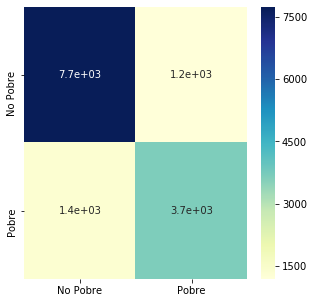

In [50]:
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.show()

In [51]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.8169306859723318


In [52]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(xtrain, ytrain)
ypred = neigh.predict(xtest)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.7944233388287578


In [53]:
svclassifier = SVC(kernel='linear', gamma='auto')
svclassifier.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
y_pred2 = svclassifier.predict(xtest)

In [55]:
test_acc2 = accuracy_score(ytest, y_pred2)
print("El accuracy es " + str(test_acc2))

El accuracy es 0.8164289298258189
